
Model Performance:
KNN: 1.000
SVM (RBF): 1.000
Random Forest: 1.000
Logistic Regression: 1.000

Best KNN Parameters: {'clf__n_neighbors': 3}
Best KNN Accuracy: 0.95


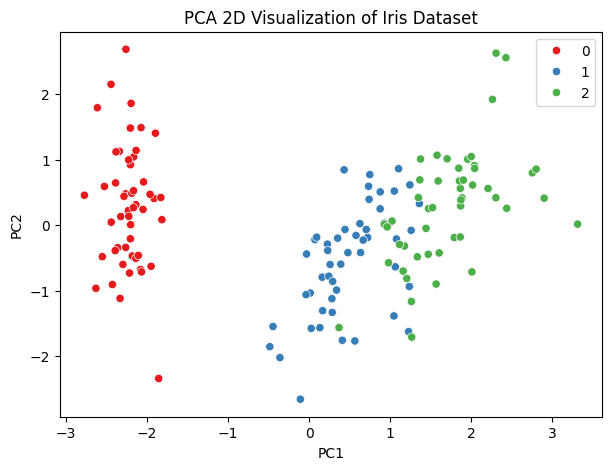

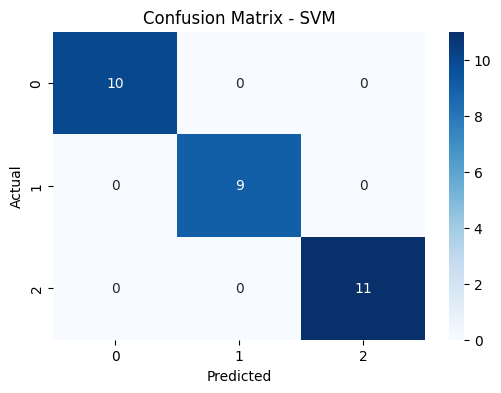


Model saved as iris_advanced_model.pkl


In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.pipeline import Pipeline

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target


# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ----------------------------------------------------------
# 🔥 Part A: Multiple Model Evaluation
# ----------------------------------------------------------

models = {
    "KNN": KNeighborsClassifier(),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    results[name] = accuracy_score(y_test, pred)

# Print performance table
print("\nModel Performance:")
for m, acc in results.items():
    print(f"{m}: {acc:.3f}")


# ----------------------------------------------------------
# 🔥 Part B: Hyperparameter Tuning (GridSearchCV)
# ----------------------------------------------------------

param_grid = {
    'clf__n_neighbors': [3, 5, 7, 9]
}

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

grid = GridSearchCV(pipe_knn, param_grid, cv=5)
grid.fit(X_train, y_train)

print("\nBest KNN Parameters:", grid.best_params_)
print("Best KNN Accuracy:", grid.best_score_)


# ----------------------------------------------------------
# 🔥 Part C: PCA Visualization (2D)
# ----------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette="Set1"
)
plt.title("PCA 2D Visualization of Iris Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# ----------------------------------------------------------
# 🔥 Part D: Confusion Matrix
# ----------------------------------------------------------

final_model = SVC(kernel='rbf')
pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', final_model)
])

pipeline_final.fit(X_train, y_train)
pred = pipeline_final.predict(X_test)

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ----------------------------------------------------------
# 🔥 Part E: Save the Model (Deployment Ready)
# ----------------------------------------------------------

import joblib
joblib.dump(pipeline_final, "iris_advanced_model.pkl")
print("\nModel saved as iris_advanced_model.pkl")
